In [1]:
import pandas as pd

In [30]:
df = pd.read_csv('../datas/MachineLearningRating_v3.txt',sep="|")

# Preview the data
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_2848\1146441393.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../datas/MachineLearningRating_v3.txt',sep="|")  # or whatever your file name is


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [31]:
# Check basic info
print(df.info())

# Look at summary statistics for numerical columns
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [32]:
# Convert date column to datetime
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

In [33]:
# Count missing values
missing = df.isnull().sum()
print("Missing values:\n", missing[missing > 0])

Missing values:
 Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64


In [34]:
df = df.drop(columns=[
    'CrossBorder',
    'NumberOfVehiclesInFleet',
    'WrittenOff',
    'Rebuilt',
    'Converted'
])


In [35]:
# Categorical: fill with mode
for col in ['Bank', 'AccountType', 'MaritalStatus', 'Gender', 'VehicleType', 'make', 'Model', 'bodytype']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Numeric: you can use median
df['Cylinders'] = df['Cylinders'].fillna(df['Cylinders'].median())
df['cubiccapacity'] = df['cubiccapacity'].fillna(df['cubiccapacity'].median())
df['kilowatts'] = df['kilowatts'].fillna(df['kilowatts'].median())

# Boolean-style or binary features
df['NewVehicle'] = df['NewVehicle'].fillna('Unknown')


In [36]:
# Sanity check
print("Missing values after cleanup:\n", df.isnull().sum().sort_values(ascending=False).head(10))


Missing values after cleanup:
 CustomValueEstimate    779642
mmcode                    552
NumberOfDoors             552
VehicleIntroDate          552
CapitalOutstanding          2
PolicyID                    0
UnderwrittenCoverID         0
Language                    0
Bank                        0
AccountType                 0
dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['CustomValueEstimate'].dropna(), bins=50, kde=True)
plt.title("Distribution of CustomValueEstimate")
plt.show()

In [38]:
df['CustomValueEstimate'] = df.groupby(
    ['make', 'Model', 'RegistrationYear']
)['CustomValueEstimate'].transform(lambda x: x.fillna(x.median()))

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keep

In [39]:
# Fallback to overall median
df['CustomValueEstimate'] = df['CustomValueEstimate'].fillna(df['CustomValueEstimate'].median())


In [40]:
print("Still missing:", df['CustomValueEstimate'].isnull().sum())

Still missing: 0


In [41]:
financial_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']
print(df[financial_cols].describe())

       TotalPremium   TotalClaims  CustomValueEstimate
count  1.000098e+06  1.000098e+06         1.000098e+06
mean   6.190550e+01  6.486119e+01         2.063610e+05
std    2.302845e+02  2.384075e+03         2.770446e+05
min   -7.825768e+02 -1.200241e+04         2.000000e+04
25%    0.000000e+00  0.000000e+00         1.360000e+05
50%    2.178333e+00  0.000000e+00         2.000000e+05
75%    2.192982e+01  0.000000e+00         2.650000e+05
max    6.528260e+04  3.930921e+05         2.655000e+07


In [42]:
# Add a loss ratio column
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
df['LossRatio'] = df['LossRatio'].replace([float('inf'), -float('inf')], 0).fillna(0)

# Overall average loss ratio
print("Overall Loss Ratio:", df['LossRatio'].mean())

# By Province
print(df.groupby('Province')['LossRatio'].mean().sort_values(ascending=False))

# By VehicleType
print(df.groupby('VehicleType')['LossRatio'].mean().sort_values(ascending=False))

# By Gender
print(df.groupby('Gender')['LossRatio'].mean().sort_values(ascending=False))


Overall Loss Ratio: 0.21636986096323907
Province
Gauteng          0.262216
Limpopo          0.252857
Mpumalanga       0.235858
Western Cape     0.193640
North West       0.178830
KwaZulu-Natal    0.174868
Eastern Cape     0.152974
Northern Cape    0.116388
Free State       0.077792
Name: LossRatio, dtype: float64
VehicleType
Heavy Commercial     0.457233
Light Commercial     0.364845
Medium Commercial    0.305509
Passenger Vehicle    0.208845
Bus                  0.000000
Name: LossRatio, dtype: float64
Gender
Female           0.247919
Not specified    0.218800
Male             0.157443
Name: LossRatio, dtype: float64


In [ ]:
#plots

# TotalClaims
sns.histplot(df['TotalClaims'], bins=100, kde=True)
plt.title("Distribution of TotalClaims")
plt.show()

# CustomValueEstimate (if imputed already)
sns.histplot(df['CustomValueEstimate'], bins=100, kde=True)
plt.title("Distribution of CustomValueEstimate")
plt.show()

In [ ]:
# TotalClaims
sns.boxplot(x=df['TotalClaims'])
plt.title("Outliers in TotalClaims")
plt.show()

# CustomValueEstimate
sns.boxplot(x=df['CustomValueEstimate'])
plt.title("Outliers in CustomValueEstimate")
plt.show()


In [45]:
print("TotalClaims Skew:", df['TotalClaims'].skew())
print("CustomValueEstimate Skew:", df['CustomValueEstimate'].skew())

TotalClaims Skew: 69.93311843463971
CustomValueEstimate Skew: 76.41676070421906


In [46]:
high_claims = df[df['TotalClaims'] > df['TotalClaims'].quantile(0.99)]
print("Extreme claims (above 99th percentile):", len(high_claims))

Extreme claims (above 99th percentile): 2788


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


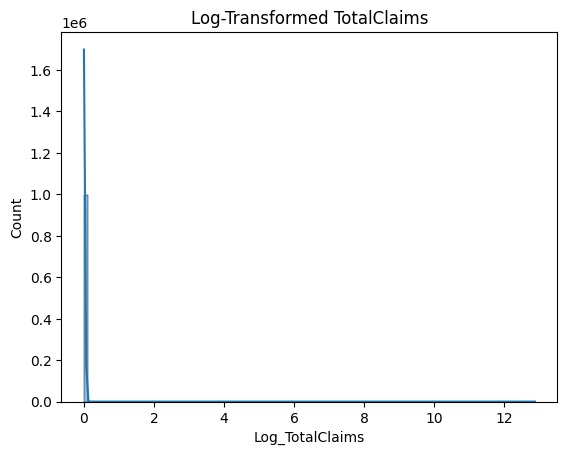

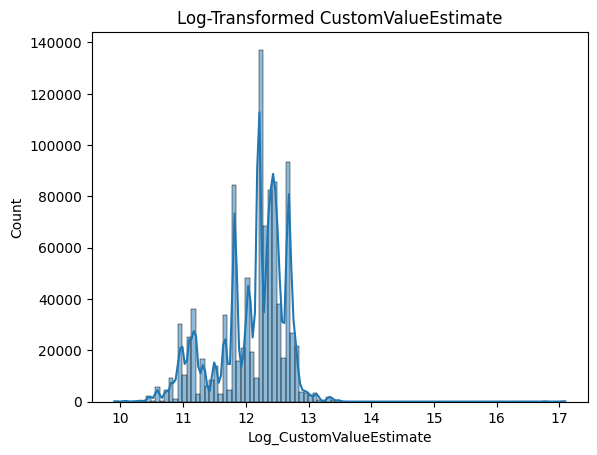

In [47]:
import numpy as np

# Add transformed columns
df['Log_TotalClaims'] = np.log1p(df['TotalClaims'])  # log1p handles 0s safely
df['Log_CustomValueEstimate'] = np.log1p(df['CustomValueEstimate'])

# Plot again after log
sns.histplot(df['Log_TotalClaims'], bins=100, kde=True)
plt.title("Log-Transformed TotalClaims")
plt.show()

sns.histplot(df['Log_CustomValueEstimate'], bins=100, kde=True)
plt.title("Log-Transformed CustomValueEstimate")
plt.show()


In [49]:
print("Log_TotalClaims Skew:", df['Log_TotalClaims'].skew())
print("Log_CustomValueEstimate Skew:", df['Log_CustomValueEstimate'].skew())

Log_TotalClaims Skew: 19.76751252298922
Log_CustomValueEstimate Skew: -0.7307299636362663


In [ ]:

# Group by month
monthly_stats = df.groupby(df['TransactionMonth'].dt.to_period('M')).agg({
    'TotalClaims': ['sum', 'count'],
    'TotalPremium': 'sum'
}).reset_index()

monthly_stats.columns = ['Month', 'TotalClaimAmount', 'ClaimCount', 'TotalPremium']

# Plot frequency
monthly_stats['Month'] = monthly_stats['Month'].astype(str)
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_stats, x='Month', y='ClaimCount', marker='o')
plt.title("Monthly Claim Frequency")
plt.xticks(rotation=45)
plt.show()

# Plot severity
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_stats, x='Month', y='TotalClaimAmount', marker='o')
plt.title("Monthly Total Claim Amount (Severity)")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Group by Make and Model
vehicle_claims = df.groupby(['make', 'Model'])['TotalClaims'].sum().reset_index()
vehicle_claims = vehicle_claims.sort_values(by='TotalClaims', ascending=False)

# Top 10
top_10 = vehicle_claims.head(10)

# Bottom 10 (excluding 0s)
bottom_10 = vehicle_claims[vehicle_claims['TotalClaims'] > 0].tail(10)

# Plotting
plt.figure(figsize=(12, 5))
sns.barplot(data=top_10, x='TotalClaims', y='make', hue='Model', dodge=False)
plt.title("Top 10 Highest Claim Vehicles")
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(data=bottom_10, x='TotalClaims', y='make', hue='Model', dodge=False)
plt.title("Bottom 10 Claim Vehicles (Non-zero)")
plt.show()

In [ ]:
# Correlation
corr_matrix = df[['TotalPremium', 'TotalClaims']].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Total Premium and Total Claims')
plt.tight_layout()
plt.savefig("../visuals/heatmap_totalpremium_vs_totalclaims.png")
plt.show()



In [ ]:
# Province-wise claim average
plt.figure(figsize=(10, 6))
df.groupby('Province')['TotalClaims'].mean().sort_values().plot(kind='barh', color='orange')
plt.title("Average Total Claims by Province")
plt.xlabel("Average Claim Amount")
plt.ylabel("Province")
plt.tight_layout()
plt.savefig('../visuals/avg_claims_by_province.png')
plt.show()

